Taken from [these lecture notes](#https://atmos.washington.edu/~breth/classes/AM582/lect/lect8-notes.pdf)

- 11.2 Red noise

Red noise has zero mean, constant variance, and is serially correlated in time,
such that the lag-1 autocorrelation between two successive time samples has
correlation coefficient 0 < r < 1. As we will show shortly, red noise has a
power spectrum weighted toward low frequencies, but has no single preferred
period. Its ‘redness’ depends on r, which can be tuned to match the observed
time series. For the Nino3.4 case, a reasonable statistical null hypothesis would
be that the observed power spectrum could have been generated purely by red
noise.
To sequentially generate a n(0, 1) red noise sequence $x_j$ from a white noise
sequence $w_j$ , we set
$$
x1 = w1
$$
<br>
$$
x_{j+1} = rx_j + (1 − r^2)^{1/2}w_{j+1},  \ \ \ \ \ \ \   j ≥ 1$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def red_noise_generator(L,s,r):
    w = np.random.normal(0,s,L)
    x = [w[0]]
    for i in range(1, L):
        x.append(r*x[i-1]+(1-r**2)**0.5*w[i])
    return np.array(x)

In [35]:
w = red_noise_generator(1000,1,0)
p = red_noise_generator(1000,1,0.5)
r = red_noise_generator(1000,1,0.99)

<IPython.core.display.Javascript object>


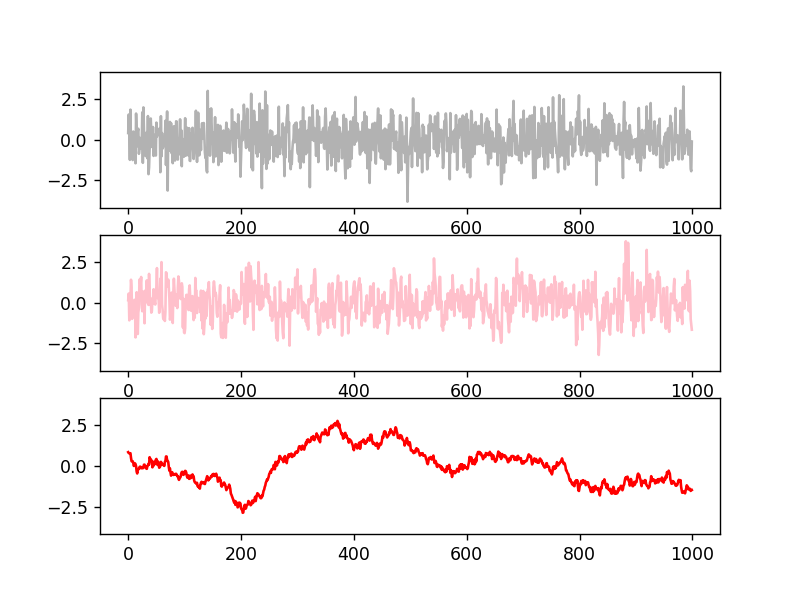

In [36]:
%matplotlib notebook
plt.figure()
ax1 = plt.subplot(311)
plt.plot(w, color = 'k', alpha=0.3)
plt.subplot(312, sharex = ax1, sharey = ax1)
plt.plot(p, color = 'pink')
plt.subplot(313, sharex = ax1, sharey = ax1)
plt.plot(r, color = 'r')
plt.tight_layout
plt.show()